# Computational Programming with Python
### Lecture 5: Functions Revisited

### Center for Mathematical Sciences, Lund University
Lecturer: Claus Führer, Malin Christersson


## This lecture

- Revision: recurrence relations and list comprehension
- Functions returning functions (partial application)
- Unpacking arguments, the star operator
- Star operators in function definitions
- Using an optional number of arguments
- Numerical integration
- The bisection method

## Revison: recurrence relations and fixed point iteration

A recursive equation 

\begin{cases}
a_0 = c \\
a_{n+1} = f(a_n), n \ge 0
\end{cases}

and the corresponding fixed point iteration

In [ ]:
a = c              # some initial value c
for i in range(n): # for some n
    a = f(a)       # where f is some function

You will ge given two examples during the break.

## Revision: list comprehension

The syntax of  a list comprehension is:

`[<expr> for <variable> in <list>]`

You can use a conditional in a list comprehension:

`[<expr> for <variable> in <list> if <condition>]`

You will be given some easy examples during the break

## List comprehension and nested lists

**Example**

Produce following matrix as nested lists

$$
\begin{bmatrix}
1 & 2 & 3 \\
10 & 20 & 30 \\
100 & 200 & 300
\end{bmatrix}
$$

In [1]:
m1 = [ [1, 2, 3],
       [10, 20, 30],
       [100, 200, 300]]
print(m1)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


We can make each row using list comprehension

In [2]:
n = 3
m2 = [ [i for i in range(1, n+1)],
       [10*i for i in range(1, n+1)],
       [100*i for i in range(1, n+1)]]
print(m2)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


or changing the arguments of the range-function

In [3]:
m3 = [ [i for i in range(1, n+1)],
       [i for i in range(10, n*10 + 1, 10)],
       [i for i in range(100, n*100 + 1, 100)]]
print(m3)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


### Using nested list comprehension

In [4]:
m4 = [ [10**exponent*i for i in range(1, n+1)] for exponent in range(n)]
print(m4)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


or

In [5]:
m5 = [ [i for i in range(10**exponent, n*10**exponent+1, 10**exponent)] for exponent in range(n)]
print(m5)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


### Using a for loop and list comprehension

In [6]:
m6 = []

for row in range(n):
    m6.append([10**row*i for i in range(1, n+1)])
print(m6)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


### Using a nested for loop

In [7]:
m7 = []

for row in range(n):
    m7.append([])
    for i in range(1, n+1):
        m7[row].append(10**row*i)
print(m7)

[[1, 2, 3], [10, 20, 30], [100, 200, 300]]


### Making slices of a nested list

Given `m1 = [ [1, 2, 3], [10, 20, 30], [100, 200, 300]]`, produce

$$
\begin{bmatrix}
1  \\
10 & 20  \\
100 & 200 & 300
\end{bmatrix}
$$

In [8]:
s1 = [ m1[0][: 1],
       m1[1][: 2],
       m1[2][:]]
print(s1)

[[1], [10, 20], [100, 200, 300]]


or

In [9]:
s2 = [m1[i][:i+1] for i in range(n) ]
print(s2)

[[1], [10, 20], [100, 200, 300]]


## Recall that a function can return a function

In [ ]:
def f(x, a, b, c, d): 
    return a*x**3+b*x**2+c*x+d

def derivative1(f, x, h = 1e-3): 
    return (f(x+h)-f(x))/h

def make_one_parameter_func(f, a, b, c, d):
    def newf(x):
        return f(x, a, b, c, d)
    return newf  # a function is returned

newf = make_one_parameter_func(f, 1, 1, 0, 0)
print("newf(1) =", newf(1))  
der = derivative1(newf, 1)
print("der =", der)

### An optional number of arguments

In order to handle

$$g(x) = A\sin(\omega x)$$

or 

$$h(x) = ax^4 +bx^3 +cx^2+dx +e$$

we need to handle an optional number of arguments.

## Unpacking arguments

Positional arguments remind us of lists. Keyword arguments remind us of dictionaries.

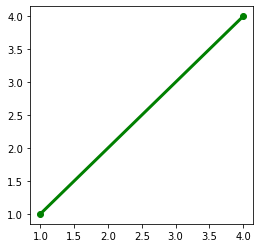

In [10]:
from numpy import*
from matplotlib.pyplot import *
%matplotlib inline

figure(figsize = (4, 4))  # make it square-shaped
data = [[1, 4], [1, 4]]
my_style = {'linewidth': 3, 'marker': 'o', 'color': 'green'}

plot(*data, **my_style) # Star operators unpack these to form a valid parameter list.

## Star operator to unpack containers

Unpacking lists

In [11]:
a, b = [0, 1]   
print("a =", a)

*c, d = [0, 1, 2, 3, 4]
print("c =", c, "d =", d)

c, *d = [0, 1, 2, 3, 4]
print("c =", c, "d =", d)

c, *d, e = [0, 1, 2, 3, 4]
print("c =", c, "d =", d, "e =", e)

a = 0
c = [0, 1, 2, 3] d = 4
c = 0 d = [1, 2, 3, 4]
c = 0 d = [1, 2, 3] e = 4


Unpacking dictionaries

In [12]:
*a, b = {"nr1": 10, "nr2": 36, "nr3": 57}  # we get the key words
print("a =", a, "b =", b)

*a, b = {"nr1": 10, "nr2": 36, "nr3": 57}.items() # we get key-word-value pairs
print("a =", a, "b =", b)

*a, b = {"nr1": 10, "nr2": 36, "nr3": 57}.values() # we get the values
print("a =", a, "b =", b)

a = ['nr1', 'nr2'] b = nr3
a = [('nr1', 10), ('nr2', 36)] b = ('nr3', 57)
a = [10, 36] b = 57


## Star operators in function definitions

A function can take an optional number of **positional** arguments by using a **single star**.

In [13]:
def add(*args):
    print(type(args))
    return sum(args)

s = add(1, 2, 3, 4, 5, 8, 70)
print("s =", s)

<class 'tuple'>
s = 93


## Star operator in function definitions (cont)

A function can take an optional number of **keyword arguments** by using a **double star**.

In [14]:
def myfunc(*args, **kwargs):
    print(type(kwargs))
    for key, val in kwargs.items():
        print(f"the key {key} has the value {val}")
         
myfunc(name = "Joe", age = 20)

<class 'dict'>
the key name has the value Joe
the key age has the value 20


You can use any names you want. The names args and kwargs are often used.

## Passing (tunneling) arguments
Also in the definition of functions you might find these constructs. This is often used to pass arguments through a function.

In [15]:
def outer(f, x, *args, **keywords): 
    return f(x, *args, **keywords)

def inner(x, y, z, u): 
    print(f"y = {y} z = {z}, u = {u}")
    return x**2

outer(inner, 3, 1, 2, u=15)

y = 1 z = 2, u = 15


9

Note, the function outer cannot know how many arguments it needs to provide a full parameter list to the “inner” function f.

## Using an optional number of arguments

Instead of using

```python
def make_one_parameter_func(f, a, b, c, d):
```

we could use

```python
def make_one_parameter_func(f, *args, **kwargs):
```

Inside the definition of the function, `args` is a tuple and `kwargs` is a dictionary.


### A new partial application

In [16]:
def g(x, A, omega): 
    return A*sin(omega*x)

def h(x, a, b, c, d, e): 
    return a*x**4+b*x**3+c*x**2+d*x+e

def derivative1(f, x, h = 1e-3): 
    return (f(x+h)-f(x))/h

def make_one_parameter_func(f, *args, **kwargs):
    def newf(x):
        return f(x, *args, **kwargs) # args and kwargs are unpacked
    return newf

newg = make_one_parameter_func(g, A = 2, omega = 3)
dgdx = derivative1(newg, 0)
print("d/dx(2 sin(3x)) when x = 0 is", dgdx)

d/dx(2 sin(3x)) when x = 0 is 5.99999100000405


### Summary

Partial applications (or closures) are used to make a new funcion with a reduced number of parameters.

Using closures we avoid having to use global variables.


```python
def make_function(...):
    # possible code
    def some_function(...):  # fewer parameters
        # code accessing variables from the enclosing scope
    return some_function
```

## Numerical integration

The module `scipy.integrate` has a function `quad` that can be used to integrate a function over an interval.

Use `quad(f, a, b)` to find

$$\int_a^b f(x) dx.$$

`quad` returns the result of the integral and the estimated error (in a tuple).

### Plots with filled area between curves

The `matplotlib.pyplot` method `filled_between` shows a filled area between two curves.

If only one $y$-argument is used, the area is filled between the $y$-values and the $x$-axis.

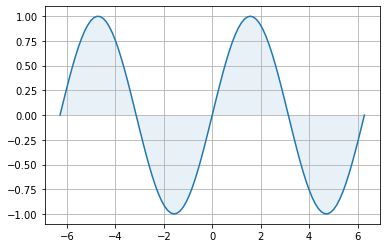

In [17]:
x = linspace(-2*pi, 2*pi, 100)
y = sin(x)

plot(x, y)                       
fill_between(x, y, alpha = 0.1)  # use semi transparent color for area
grid()

### Fill area between two $x$-values

To show filled area where $ -\pi \lt x \lt \pi/2$, use two $x$-arrays.

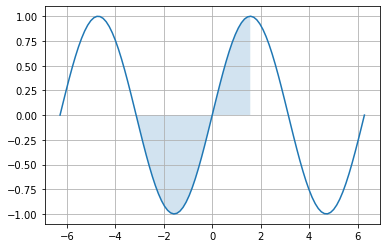

In [18]:
x = linspace(-2*pi, 2*pi, 100)  # for the graph

x1 = linspace(-pi, pi/2, 50)    # for the filled area

plot(x, sin(x))                       
fill_between(x1, sin(x1), alpha = 0.2) 
grid() 

### Fill area between two graphs

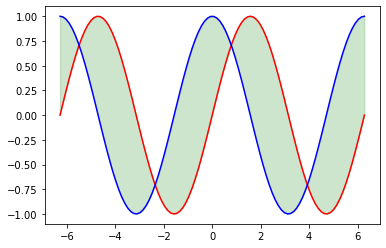

In [19]:
x = linspace(-2*pi, 2*pi, 100)
y1 = sin(x)
y2 = cos(x)

plot(x, y1, color='red')
plot(x, y2, color='blue')
fill_between(x, y1, y2, color='green', alpha=0.2)

### Fill area between two graphs using `where`

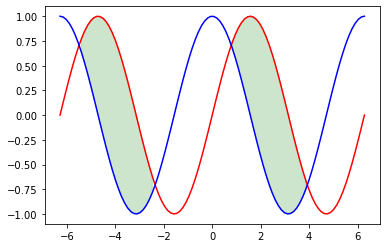

In [20]:
x = linspace(-2*pi, 2*pi, 100)
y1 = sin(x)
y2 = cos(x)

plot(x, y1, color='red')
plot(x, y2, color='blue')
fill_between(x, y1, y2, where=y1>y2, color='green', alpha=0.2)

`where` results in a **Boolean array**, which we will talk about in lectures to come.

## More about the bisection method

One approach using a list as parameter and changing the content of that list:

In [21]:
def bisec1(f, interval, tol):
    for i in range(100):
        if interval[1]-interval[0] < tol:
            break
        mid = (interval[0]+interval[1])/2
        if f(interval[0])*f(mid) < 0:
            interval[1] = mid
        else:
            interval[0] = mid
    return interval, mid

### Testing `bisec1` 

mid =  -1.2909944480052218


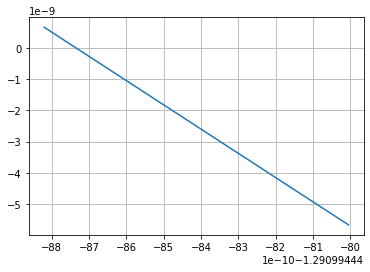

In [22]:
def f(x): return 3*x**2-5

def make_plot(f, interval):
    x = linspace(interval[0], interval[1], 50)
    plot(x, f(x))
    grid()  

interval = [-3, 0.5]

i, m = bisec1(f, interval, 1e-9)  
print("mid = ", m)
make_plot(f, interval)  # the plot must be made before bisec1 is called

### An approach not changing the content of `interval`

In [23]:
def bisec2(f, interval, tol):
    a = interval[0]          # all changes are made on a and b
    b = interval[1]
    for i in range(100):
        if b-a < tol:
            break
        mid = (a+b)/2
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    return [a, b], mid

### Testing `bisec2` 

mid =  -1.2909944480052218


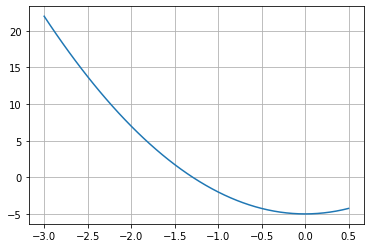

In [24]:
def f(x): return 3*x**2-5

def make_plot(f, interval):
    x = linspace(interval[0], interval[1], 50)
    plot(x, f(x))
    grid()   

interval = [-3, 0.5]
i, m = bisec2(f, interval, 1e-9)  
print("mid = ", m)
make_plot(f, interval)        # works since interval is intact since creation

### An approach using the end points of `interval` 

In [25]:
def bisec3(f, a, b, tol):  # a and b are endpoints of the interval
    for i in range(100):
        if b-a < tol:
            break
        mid = (a+b)/2
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid
    return [a, b], mid

### Testing `bisec3` 

mid =  -1.2909944480052218


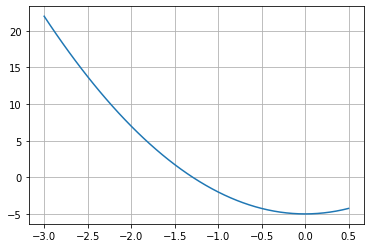

In [26]:
def f(x): return 3*x**2-5

def make_plot(f, interval):
    x = linspace(interval[0], interval[1], 50)
    plot(x, f(x))
    grid()   

interval = [-3, 0.5]
i, m = bisec3(f, interval[0], interval[1], 1e-9)  # pass the end points as arguments
print("mid = ", m)
make_plot(f, interval) 

### An approach using `return` to break

In [27]:
def bisec4(f, a, b, tol):  # a and b are endpoints of the interval
    for i in range(100):
        if b-a < tol:
             return [a, b], mid
        mid = (a+b)/2
        if f(a)*f(mid) < 0:
            b = mid
        else:
            a = mid

i, m = bisec4(f, -3, 0.5, 1e-9)
print(m)

-1.2909944480052218


## A recursive function

In [28]:
def bisec5(f, a, b, tol):
    mid = (a+b)/2
    if b-a <= tol:
             return [a, b], mid
    if f(a)*f(mid) < 0:
        return bisec5(f, a, mid, tol)
    else:
        return bisec5(f, mid, b, tol)

i, m = bisec5(f, -3, 0.5, 1e-9)
print(m)

-1.2909944484126754


In general, avoid recursive functions in Python.